# TUGAS PRAKTIKUM
Multiple Linear Regression

In [2]:
# IMPORT LIBRARY
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# LOAD DATA
from google.colab import files
uploaded = files.upload() # upload dataset

Saving insurance.csv to insurance.csv


In [4]:
data = pd.read_csv('insurance.csv')

In [6]:
# mengecek ukuran data
data.shape

(1338, 7)

Dataset dari "Medical Cost Personal Datasets" berisi 1.338 baris dan 7 kolom.
* age: Usia seseorang (numerik).
* sex: Jenis kelamin, dengan nilai 'male' atau 'female'.
* bmi: Body Mass Index, ukuran berat badan dalam kg/m² (numerik).
* children: Jumlah anak yang diasuransikan (numerik).
* smoker: Status merokok, dengan nilai 'yes' atau 'no'.
* region: Wilayah tempat tinggal, dengan nilai 'southwest', 'southeast', 'northwest', 'northeast'.
* charges: Biaya medis personal (variabel target).

In [5]:
# melihat beberapa data awal
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
# informasi tentang data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
# deskripsi data
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


1. Mengubah variabel seperti sex, smoker, dan region menjadi nilai numerik menggunakan LabelEncoder.

In [9]:
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
le = LabelEncoder()
data['sex'] = le.fit_transform(data['sex'])
data['smoker'] = le.fit_transform(data['smoker'])
data['region'] = le.fit_transform(data['region'])

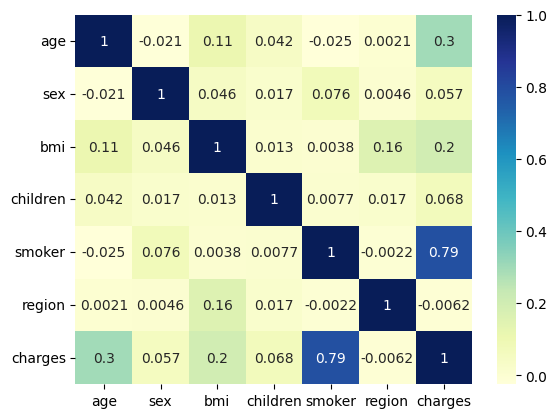

In [10]:
numeric_data = data.select_dtypes(include=[float, int])

# Plot heatmap menggunakan data numerik
sns.heatmap(numeric_data.corr(), cmap="YlGnBu", annot=True)
plt.show()

Pada heatmap korelasi diatas: Smoker dan Charges memiliki korelasi paling kuat (0.79). Ini menunjukkan bahwa status perokok memiliki hubungan positif yang kuat dengan biaya medis; perokok cenderung memiliki biaya medis yang lebih tinggi.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


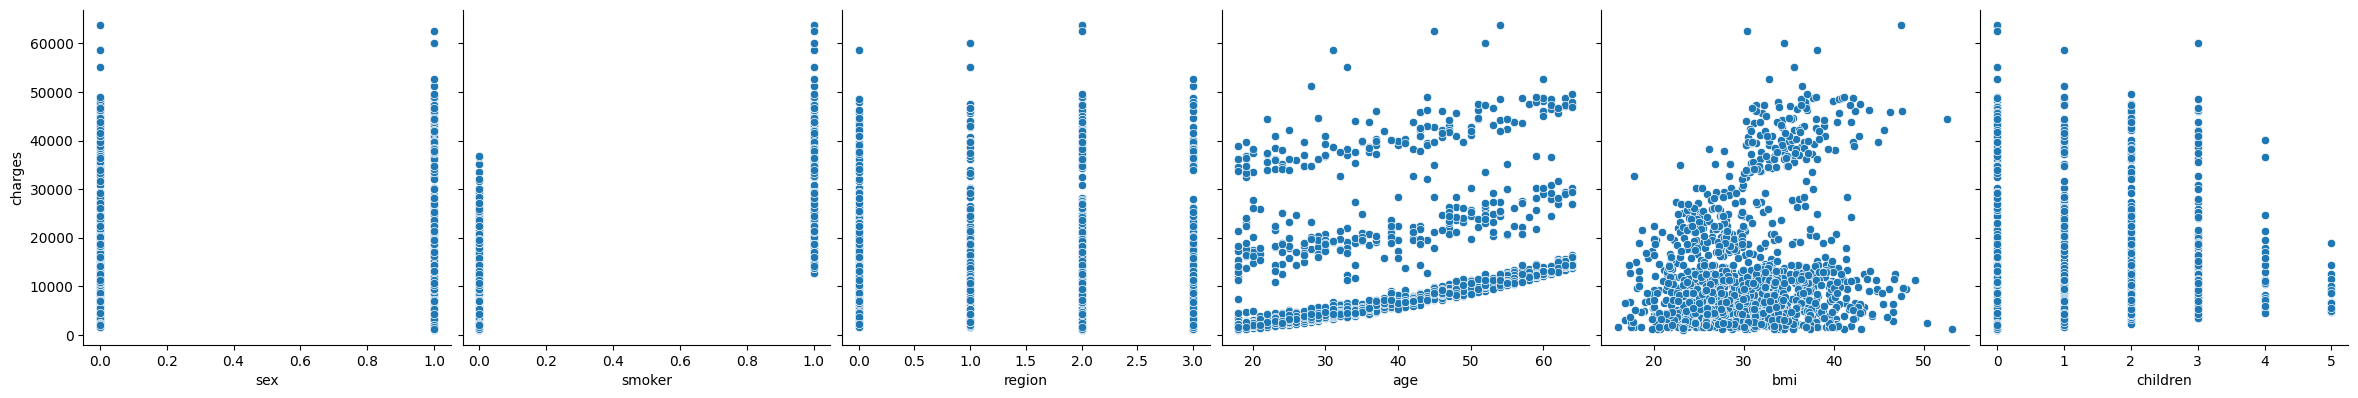

In [11]:
# visualisasi data dengan pairplot
sns.pairplot(data, x_vars=['sex', 'smoker', 'region', 'age', 'bmi', 'children'],
             y_vars='charges', size=4, aspect=1, kind='scatter')
plt.show()

In [43]:
# identifikasi Fitur (variabel bebas) dan target (variabel terikat)
from sklearn.model_selection import train_test_split
X = data.drop(columns='charges')
y = data['charges']

Bagi dataset menjadi data latih (train) dan data uji (test) dengan proporsi yang sesuai.

In [44]:
# split dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)
X_train.head(), X_test.head()

(      age  sex    bmi  children  smoker  region
 560    46    0  19.95         2       0       1
 1285   47    0  24.32         0       0       0
 1142   52    0  24.86         0       0       2
 969    39    0  34.32         5       0       2
 486    54    0  21.47         3       0       1,
       age  sex     bmi  children  smoker  region
 764    45    0  25.175         2       0       0
 887    36    0  30.020         0       0       1
 890    64    0  26.885         0       1       1
 1293   46    1  25.745         3       0       1
 259    19    1  31.920         0       1       1)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


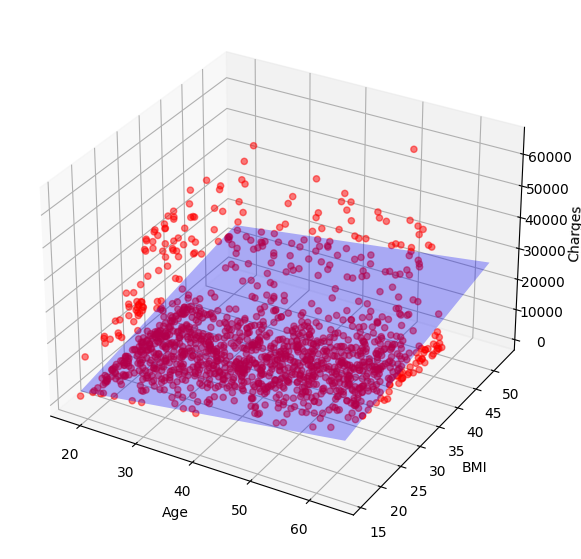

In [28]:
# Visualisasi secara 3d
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from sklearn.linear_model import LinearRegression

# Menggunakan dua fitur: age dan bmi
X = data[['age', 'bmi']]
y = data['charges']

# Membuat model regresi linear
model = LinearRegression()
model.fit(X, y)

# Membuat grid dari nilai-nilai age dan bmi untuk visualisasi
x_surf, y_surf = np.meshgrid(np.linspace(X['age'].min(), X['age'].max(), 100),
                             np.linspace(X['bmi'].min(), X['bmi'].max(), 100))

# Menyusun kembali grid dalam bentuk array 2D
exog = np.array([x_surf.ravel(), y_surf.ravel()]).T

# Prediksi charges berdasarkan grid
z_surf = model.predict(exog).reshape(x_surf.shape)

# Membuat visualisasi 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot data asli (scatter plot)
ax.scatter(X['age'], X['bmi'], y, c='r', marker='o', alpha=0.5)

# Plot permukaan regresi
ax.plot_surface(x_surf, y_surf, z_surf, color='b', alpha=0.3, rstride=100, cstride=100)

# Label sumbu
ax.set_xlabel('Age')
ax.set_ylabel('BMI')
ax.set_zlabel('Charges')

plt.show()


Kesimpulan:

* Pada data X_train, terlihat bahwa usia berkisar antara 46 hingga 54 tahun, dengan nilai BMI yang berkisar antara 19,95 hingga 34,32.
* Pada data X_test, terlihat bahwa usia berkisar antara 19 hingga 45 tahun, dengan BMI yang berkisar antara 25,17 hingga 31,92.
* Jadi, data uji memiliki rentang usia yang lebih luas, mencakup individu yang lebih muda (19 tahun) dibandingkan dengan data latih yang lebih fokus pada usia paruh baya hingga lebih tua (46 hingga 54 tahun).


Melakukan feature scaling jika diperlukan.

In [14]:
# Lakukan feature scaling jika diperlukan.
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Membuat model multiple linear regression menggunakan Scikit-Learn.

In [15]:
# Buat model multiple linear regression menggunakan Scikit-Learn.
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Melatih model pada data latih dan lakukan prediksi pada data uji.

In [16]:
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     508.7
Date:                Tue, 17 Sep 2024   Prob (F-statistic):          2.71e-308
Time:                        15:25:32   Log-Likelihood:                -10845.
No. Observations:                1070   AIC:                         2.170e+04
Df Residuals:                    1063   BIC:                         2.174e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.335e+04    187.273     71.265      0.000     1.3e+04    1.37e+04
x1          3616.1087    189.232     19.109      0.000    3244.798    3987.419
x2            -9.3930    187.829     -0.050      0.960    -377.952     359.166
x3          2028.3086    191.215     10.607      0.000    1653.107    2403.510
x4           516.6626    187.698      2.753      0.006     148.362     884.963
x5          9557.1434    188.026     50.829      0.000    9188.198    9926.089
x6          -302.3880    189.907     -1.592      0.112    -675.023      70.247
==============================================================================
Omnibus:                      251.823   Durbin-Watson:                   2.085
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              611.548
Skew:                           1.251   Prob(JB):                    1.60e-133
Kurtosis:                       5.731   Cond. No.                         1.24
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'R2: {r2}\nMSE: {mse}\nMAE: {mae}')


R2: 0.7833463107364536
MSE: 33635210.43117845
MAE: 4186.508898366436


## **Kesimpulan Akhir:**
### 1. R-squared (R²): 0.7833
- R² = 1 berarti model mampu menjelaskan 100% variabilitas dari target.
- R² = 0 berarti model tidak dapat menjelaskan variabilitas sama sekali.
- Dengan R² = 0.783, model ini mampu menjelaskan sekitar 78,3% dari variabilitas biaya medis (charges).

### 2. Mean Squared Error (MSE): 33,652,510.43
* Nilai MSE yang besar, seperti 33,652,510, menunjukkan bahwa ada perbedaan yang cukup besar antara prediksi model dan nilai biaya medis sebenarnya pada beberapa data. Namun, MSE sangat dipengaruhi oleh skala data, sehingga nilainya besar karena biaya medis (charges) juga memiliki rentang yang cukup besar.

### 3. Mean Absolute Error (MAE): 4,186.51
* Dengan MAE = 4,186.51, model, secara rata-rata, meleset dalam prediksi biaya medis sekitar $4,186. Kesalahan ini relatif besar dalam konteks prediksi biaya medis, yang mungkin disebabkan oleh variabel lain yang memengaruhi biaya medis tetapi tidak ditangkap oleh model.